<a href="https://colab.research.google.com/github/kok554/2024-1-BDA/blob/main/inclass/13w14w_0610_mon_A_ch15_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)
print(msno.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
2.0.3
1.25.2
0.13.1
0.5.2


## 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 18.5 MB/s eta 0:00:00


## 그래프 설정

In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [5]:
# 그림 해상도와 크기: 해상도를 높이면 크기에 비례에 커짐
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.dpi' : '100'})             # 해상도, 기본값 72
plt.rcParams.update({'figure.figsize' : [4, 2.5]})      # 그림 크기, 기본값 [6, 4]

In [6]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

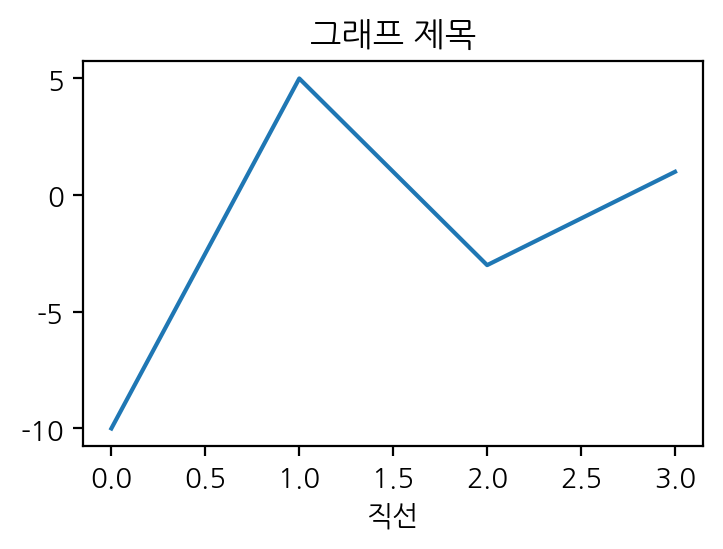

In [7]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [8]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 46 (delta 7), reused 7 (delta 1), pack-reused 0
Receiving objects: 100% (46/46), 4.59 MiB | 5.93 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [9]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


## 데이터프레임 가로로 여러 개 출력하기

In [10]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [11]:
display_side_by_side(exam.head(), exam[['id', 'math', 'english']].head())

id 
 nclass 
 math 
 english 
 science 
 
 
 
 
 0 
 1 
 1 
 50 
 98 
 50 
 
 
 1 
 2 
 1 
 60 
 97 
 60 
 
 
 2 
 3 
 1 
 45 
 86 
 78 
 
 
 3 
 4 
 1 
 30 
 98 
 58 
 
 
 4 
 5 
 2 
 25 
 80 
 65 
 
 
      
 
 
 
 id 
 math 
 english 
 
 
 
 
 0 
 1 
 50 
 98 
 
 
 1 
 2 
 60 
 97 
 
 
 2 
 3 
 45 
 86 
 
 
 3 
 4 
 30 
 98 
 
 
 4 
 5 
 25 
 80

## 머신러닝을 이용한 예측 분석

## 소득 예측 모델 코딩 절차
* adult 데이터
  * 미국인의 성별, 인종, 직업. 학력, 소득 등 다양한 인적 정보를 담고 있는 인구 조사 데이터임
  * audlt 데이터를 이용해 인적 정보로 소득을 예측하는 의사결정나무 모델을 생성, 예측
* 전처리 -> 모델 만들기 -> 예측 및 성능평가

## 데이터 분리: 학습 데이터 + 평가 데이터

* 예측 변수와 타켓 변수
  * 예측하는데 활용하는 변수 또는 모델에 입력하는 값을 예측 변수라 함.
* 타겟 변수
  * 예측하고자 하는 변수 또는 모델이 출력하는 값을 타겟 변수라 함.
* 만약 환자의 성별, 나이, 흡연 여부, 음주 여부로 당뇨병 발병을 예측하는 모델을 만든다면
  * 성별, 나이, 흡연 여부, 음주 여부는 예측 변수로 사용
  * 당뇨병 발병 여부는 타겟 변수로 사용

## UC Irvine Machine Learning Repository

In [12]:
import pandas as pd
df = pd.read_csv('data/adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df['native_country'].value_counts()

native_country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [14]:
df['native_country'].value_counts().sort_index()

native_country
?                               857
Cambodia                         28
Canada                          182
China                           122
Columbia                         85
Cuba                            138
Dominican-Republic              103
Ecuador                          45
El-Salvador                     155
England                         127
France                           38
Germany                         206
Greece                           49
Guatemala                        88
Haiti                            75
Holand-Netherlands                1
Honduras                         20
Hong                             30
Hungary                          19
India                           151
Iran                             59
Ireland                          37
Italy                           105
Jamaica                         106
Japan                            92
Laos                             23
Mexico                          951
Nicaragua    

In [15]:
df['native_country'].isna().sum()

0

In [16]:
df[df['native_country'] == '?']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
48791,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [17]:
df.query('native_country == "?"')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
48791,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [18]:
df.sample(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
6554,52,Private,24740,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1740,55,United-States,<=50K
25212,20,Private,187158,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,15,United-States,<=50K
26723,20,Private,528616,5th-6th,3,Never-married,Other-service,Other-relative,White,Male,0,0,40,Mexico,<=50K
16256,23,Private,93977,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
25861,35,Federal-gov,35309,Bachelors,13,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,28,?,<=50K


In [19]:
df.marital_status.value_counts()

marital_status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [20]:
df['marital_status'].value_counts().sort_index()

marital_status
Divorced                  6633
Married-AF-spouse           37
Married-civ-spouse       22379
Married-spouse-absent      628
Never-married            16117
Separated                 1530
Widowed                   1518
Name: count, dtype: int64

<Axes: >

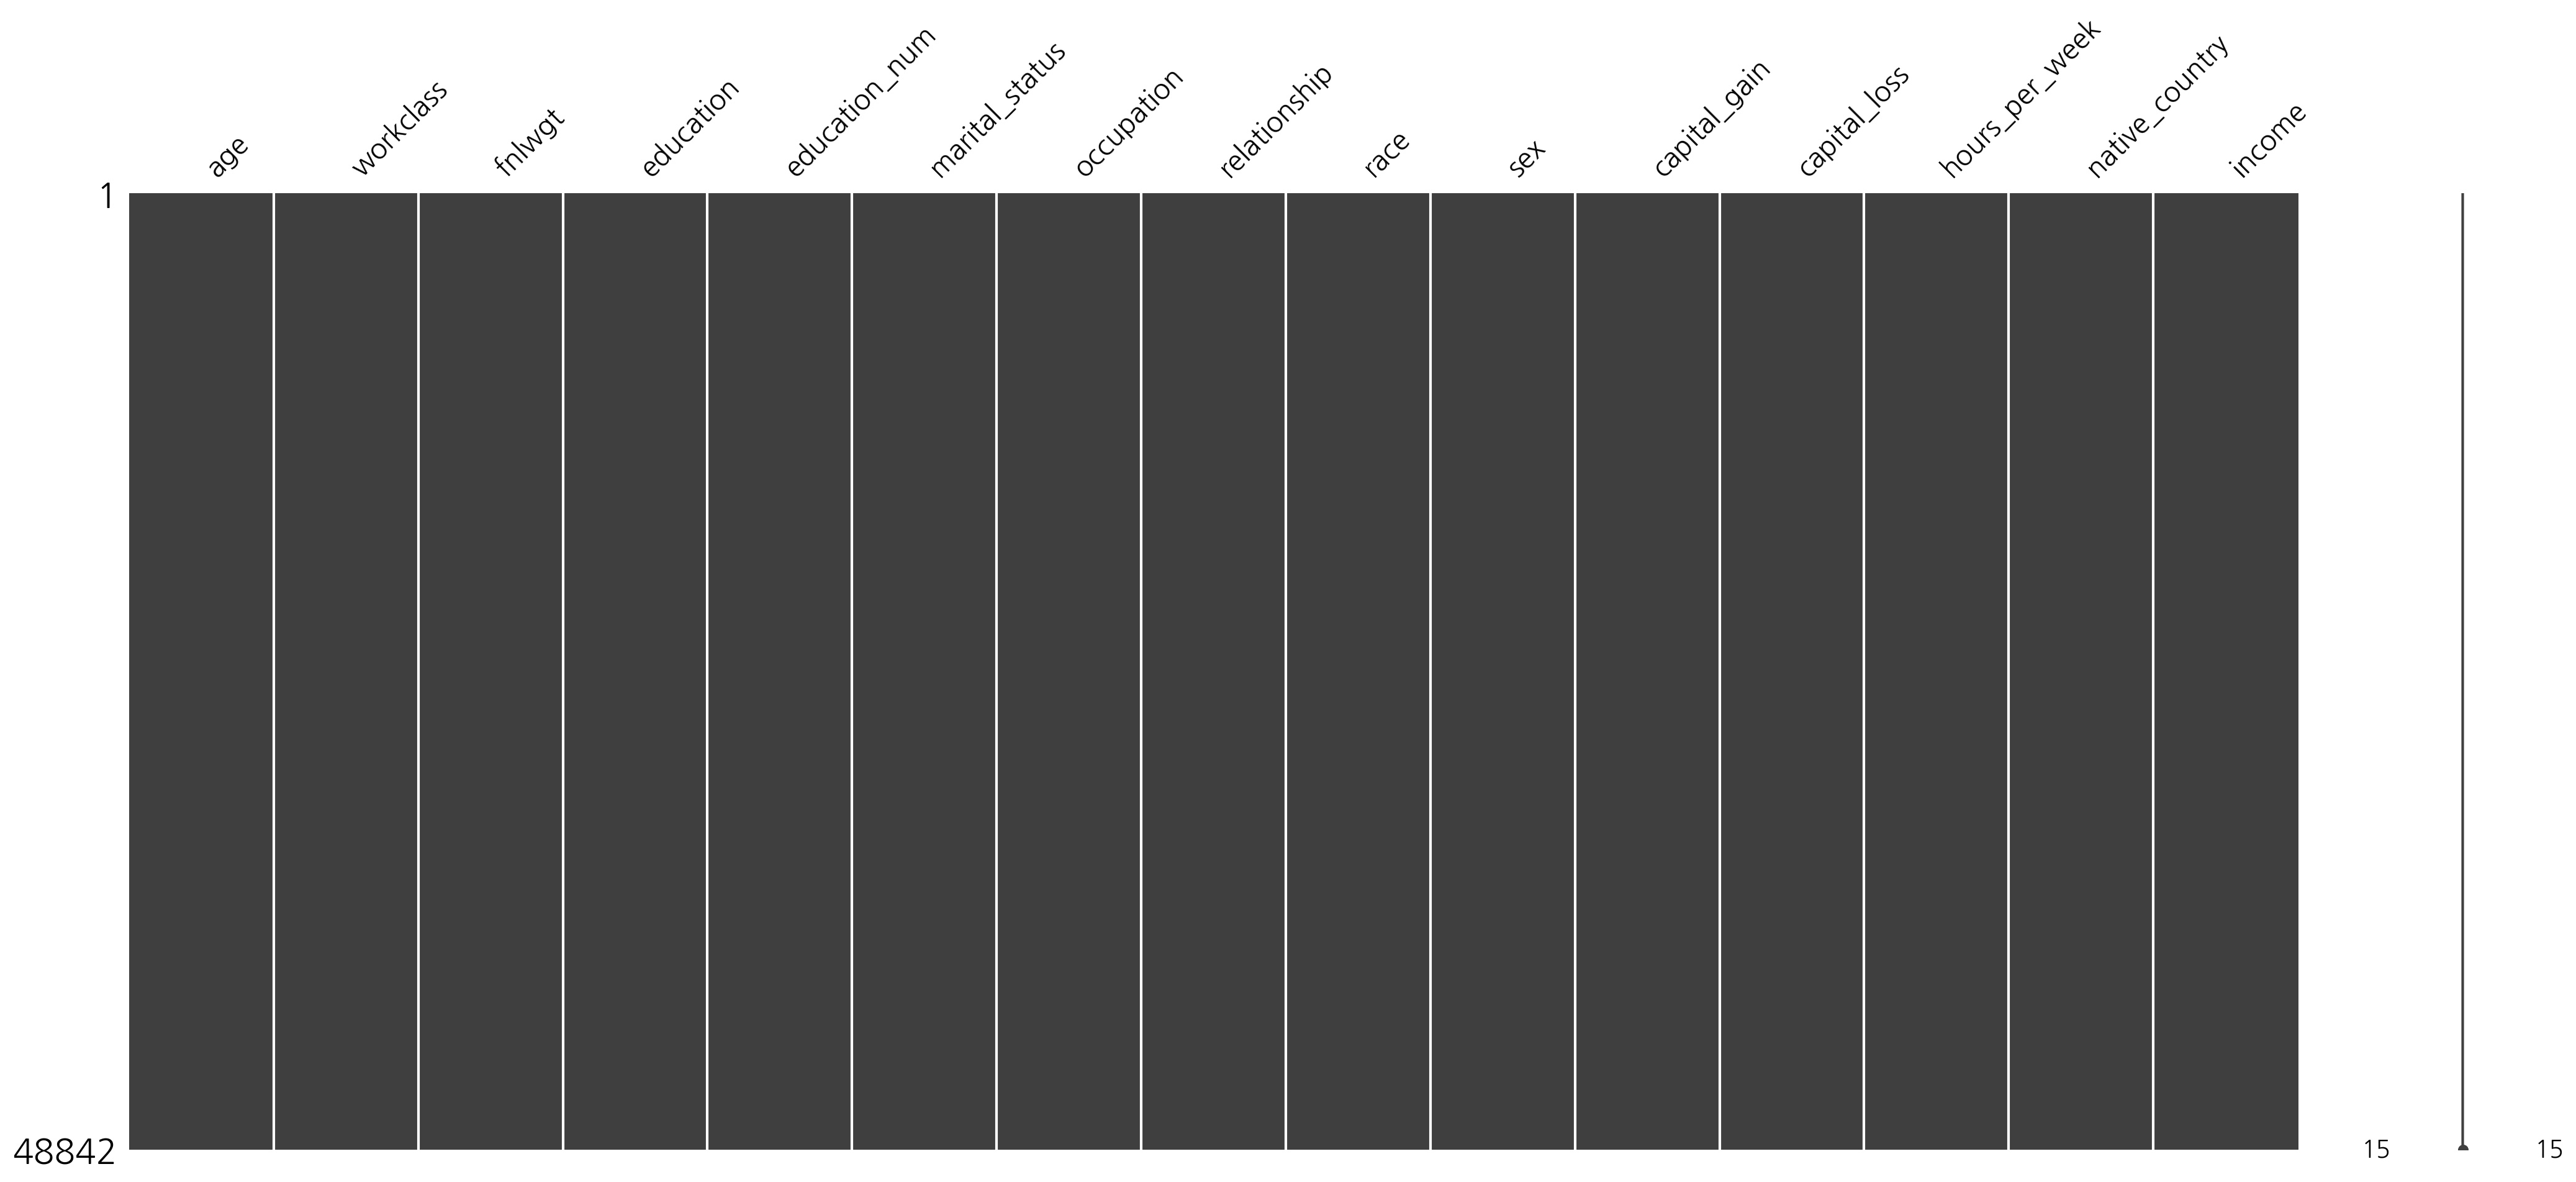

In [21]:
msno.matrix(df)

## 전처리하기
1. 타겟 변수 전처리

In [22]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [23]:
df['income'].value_counts(normalize=True)

income
<=50K    0.76
>50K     0.24
Name: proportion, dtype: float64

In [24]:
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')
df['income'].value_counts(normalize = True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

## 2. 불필요한 변수 제거하기

In [25]:
df = df.drop(columns = 'fnlwgt')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   education_num   48842 non-null  int64 
 4   marital_status  48842 non-null  object
 5   occupation      48842 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital_gain    48842 non-null  int64 
 10  capital_loss    48842 non-null  int64 
 11  hours_per_week  48842 non-null  int64 
 12  native_country  48842 non-null  object
 13  income          48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


## 3. 문자 타입 변수를 숫자 타입으로 바꾸기

## 원핫 인코딩 코딩 학습

In [27]:
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [28]:
df_tmp['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [29]:
df_tmp.sample(5)

,sex
12555,Male
45663,Male
44294,Female
35181,Male
8981,Male


함수 pd.get_dummies()

In [30]:
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  bool 
 1   sex_Male    48842 non-null  bool 
dtypes: bool(2)
memory usage: 95.5 KB


In [31]:
df_tmp.sample(5)

,sex_Female,sex_Male
29704,False,True
38870,True,False
26286,False,True
26635,True,False
31738,True,False


In [32]:
df_tmp.head()

,sex_Female,sex_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


## 원 핫 인코딩(복습, 기말시험)

In [33]:
mydf = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})
mydf

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [34]:
pd.get_dummies(mydf)

,C,A_a,A_b,B_a,B_b,B_c
0,1,True,False,False,True,False
1,2,False,True,True,False,False
2,3,True,False,False,False,True


In [35]:
pd.get_dummies(mydf, prefix=['col1', 'col2'])

,C,col1_a,col1_b,col2_a,col2_b,col2_c
0,1,True,False,False,True,False
1,2,False,True,True,False,False
2,3,True,False,False,False,True


## 다시 본론으로 돌아와 머신러닝 계속

In [36]:
df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

## df에서 'income' 열만 제외하고 나머지 열만 더미(dummies)를 만들어 df에 반영
  * 타겟 변수 'income' 열도 범주형이라서 그대로 더미(원핫인코딩)를 만들지 말고
  * 'income' 열을 제거해 저장해 놓은 후 더미를 만들고 나중에 다시 income을 복원(대입)

In [37]:
target = df['income']

df = df.drop(columns = 'income')
df = pd.get_dummies(df)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 107 entries, age to native_country_Yugoslavia
dtypes: bool(102), int64(5)
memory usage: 6.6 MB


In [39]:
df.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       ...
       'native_country_Portugal', 'native_country_Puerto-Rico',
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia'],
      dtype='object', length=107)

In [40]:
df.sample(5)

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
34124,57,13,0,0,45,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
33115,26,13,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
440,32,9,2580,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
19768,44,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
20982,36,6,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


* 'income' 열을 저장해 놓은 target을 다시 income으로 복원(대입)

In [41]:
df['income'] = target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: bool(102), int64(5), object(1)
memory usage: 7.0+ MB


In [42]:
import numpy as np
df.info(max_cols = np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  bool  
 6    workclass_Federal-gov                      48842 non-null  bool  
 7    workclass_Local-gov                        48842 non-null  bool  
 8    workclass_Never-worked                     48842 non-null  bool  
 9    workclass_Private                          48842 non-null  bool  
 10   workclass_Self-emp-i

In [43]:
import numpy as np
df.iloc[:,0:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     48842 non-null  int64
 1   education_num           48842 non-null  int64
 2   capital_gain            48842 non-null  int64
 3   capital_loss            48842 non-null  int64
 4   hours_per_week          48842 non-null  int64
 5   workclass_?             48842 non-null  bool 
 6   workclass_Federal-gov   48842 non-null  bool 
 7   workclass_Local-gov     48842 non-null  bool 
 8   workclass_Never-worked  48842 non-null  bool 
 9   workclass_Private       48842 non-null  bool 
dtypes: bool(5), int64(5)
memory usage: 2.1 MB


## 4. 데이터 분할하기
## adult 데이터 분할하기

In [44]:
pip install scikit-learn

In [45]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [46]:
df.shape

(48842, 108)

In [47]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,          # 테스트 세트 비율, 훈련: 70%, 데스트: 30%
                                     stratify = df['income'],  # 타겟 변수 비율 유지, 훈련과 데스트 데이터의 income 비율을 같게 유지
                                     random_state = 1234)      # 난수 고정

In [48]:
df_train.shape

(34189, 108)

In [49]:
df_test.shape

(14653, 108)

In [50]:
df_test.shape[0] / (df_train.shape[0] + df_test.shape[0])

0.30000818967282256

In [51]:
df_train['income'].value_counts(normalize=True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

In [52]:
df_test['income'].value_counts(normalize=True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

In [53]:
df['income'].value_counts(normalize=True)

income
low     0.76
high    0.24
Name: proportion, dtype: float64

## 목표
  * 의사결정트리(decision tree) 모델을 만들어
    * 여러 개의 다른 속성(107개)으로
    * 타겟 속성 income이 high와 low 중에 무엇인지 맞추기

## 의사결정나무 모델이란?
  * 의사결정나무(decision tree) 모델
    * 마치 스무고개 놀이처럼 순서대로 주어진 질문에 yes/no로 답하면 마지막 결론을 얻는 구조로 되어 있음
    * 질문이 나열된 모양이 가지를 뻗은 '나무'와 비슷하고,
    * 예측값을 무엇으로 할지 '의사 결정'해 주기 때문에 의사결정나무라는 이름을 가지고 있음.

## 의사결정나무 모델 만들기
## 모델 설정하기

In [54]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234, # 난수고정
                                  max_depth = 3)        # 나무 깊이

## 모델 만들기

* 훈련용 데이터에서 예측변수와 타겟변수를 분리
  * train_x, train_y

In [55]:
train_x = df_train.drop(columns = 'income') # 예측 변수 추출
train_y = df_train['income']                # 타겟 변수 추출

In [56]:
df_train[['age', 'education_num', 'capital_gain','income']].head()

,age,education_num,capital_gain,income
42105,35,13,0,low
758,62,9,0,low
19450,41,9,0,low
19815,21,10,0,low
21620,20,10,0,low


In [57]:
display_side_by_side(train_x.iloc[:, :4].head(), train_y.to_frame().head())

age 
 education_num 
 capital_gain 
 capital_loss 
 
 
 
 
 42105 
 35 
 13 
 0 
 0 
 
 
 758 
 62 
 9 
 0 
 0 
 
 
 19450 
 41 
 9 
 0 
 0 
 
 
 19815 
 21 
 10 
 0 
 0 
 
 
 21620 
 20 
 10 
 0 
 0 
 
 
      
 
 
 
 income 
 
 
 
 
 42105 
 low 
 
 
 758 
 low 
 
 
 19450 
 low 
 
 
 19815 
 low 
 
 
 21620 
 low

## 모델 훈련
  * 적합한 예측변수를 선택해 타겟 예측을 잘하도록 훈련

In [58]:
model = clf.fit(X= train_x, y= train_y)

## 적합(X, y, sample_weight= None, check_input = True)
## 훈련 세트(X,y)에서 의사결정 트리 분류기를 구축합니다

* 매개변수: X: 모양의{배열과 유사한 희소행렬} (n_samples, n_features)
  훈련 입력 샘플. 내부적 dtype=np.float32 으로 희소 행렬이 제공되면 희소 행렬 로 변환됩니다.

* y : 모양의 배열과 같은 (n_samples,) 또는 (n_samples, n_outputs)
  정수 또는 문자열로 된 대상 값(클래스 레이블)입니다.

* Sample_weight : 배열과 유사한 모양(n_samples,), 기본값 = None
  샘플 가중치. 없음인 경우 샘플에 동일한 가중치가 부여됩니다. 순 가중치가 0이거나 음수인 하위 노드를 생성하는 분할은 각 노드에서 분할을 검색하는 동안 무시됩니다. 분할로 인해 하위 노드 중 하나에서 단일 클래스가 음의 가중치를 갖게 되는 경우에도 분할이 무시됩니다.

* check_input : bool, 기본값 = True
  여러 입력 검사를 우회할 수 있습니다. 수행중인ㄴ 작업을 알지 못하는 경우에는 이 매개변수를 사용하지 마십시오.

In [60]:
df_train['marital_status_Married-civ-spouse'].value_counts()

marital_status_Married-civ-spouse
False    18525
True     15664
Name: count, dtype: int64

In [61]:
df_train['marital_status_Married-civ-spouse'].value_counts(normalize=True)

marital_status_Married-civ-spouse
False    0.54
True     0.46
Name: proportion, dtype: float64

## 모델 구조 살펴보기

In [62]:
train_x.columns[32]

'marital_status_Married-civ-spouse'

In [63]:
len(train_x)

34189

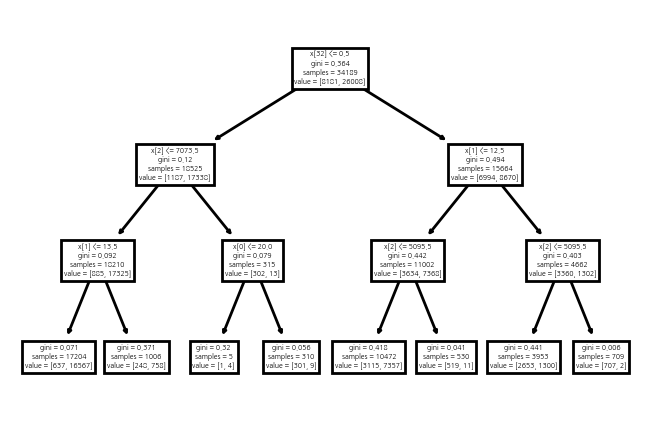

In [64]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi'     : '100',     # 그래프 크기 설정
                     'figure.figsize' : [12, 8]})  # 해상도 설정
tree.plot_tree(model);

## 결과의 첫 노드에서 기준 (x[32] <= 0.5) 으로 다음 이동
  * 현 노드에서 income이 high = 8181, low = 26008 인 상태
  * x[32] <= 0.5 가 True이면 왼쪽 트리(['결혼해 배우자가 있음(결혼상태)' == 0: 없음])로 진행
  * x[32] <= 0.5 가 Flase이면 오른쪽 트리(['결혼해 배우자가 있음(결혼상태)' == 1: 있음])로 진행

## 지니 (gini)계수
  * 불평등의 정도를 나타내는 통계학적 지수
  * 서로 다른 데이터가 비슷하게 있을수록 지니 지수는 높아짐
  * 정보 이득의 최대화 -> 불순도의 감소 -> 지니 지수 감소

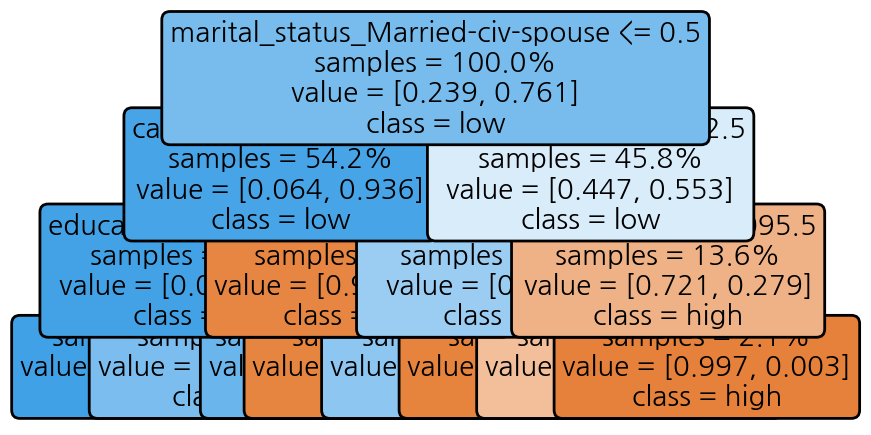

In [65]:
tree.plot_tree(model,
               feature_names = train_x.columns,  # 예측 변수명
               class_names = ['high', 'low'],    # 타겟 변수 클래스, 알파벳순
               proportion = True,                # 비율 표기
               filled = True,                    # 색칠
               rounded = True,                   # 둥근 테두리
               impurity = False,                 # 불순도 표시
               # label = 'root',                 # label 표시 위치
               fontsize = 10);

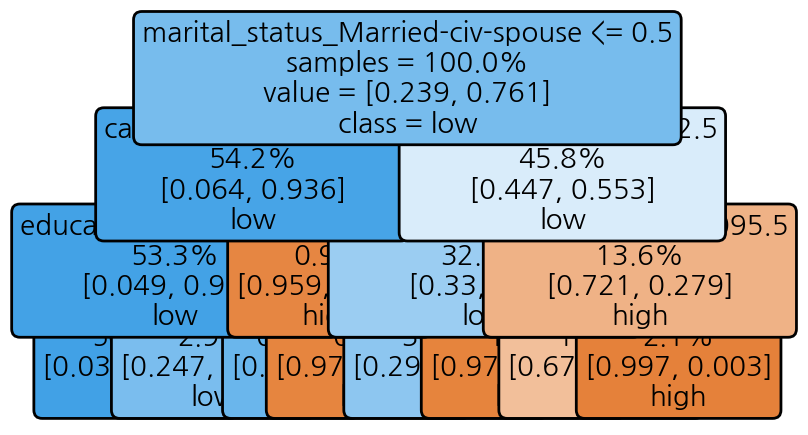

In [66]:
tree.plot_tree(model,
               feature_names = train_x.columns,  # 예측 변수명
               class_names = ['high', 'low'],    # 타겟 변수 클래스, 알파벳순
               proportion = True,                # 비율 표기
               filled = True,                    # 색칠
               rounded = True,                   # 둥근 테두리
               impurity = False,                 # 불순도 표시
               label = 'root',                   # label 표시 위치
               fontsize = 10);                   # 글자 크기
# 2단계 노드에서 54.2%와 45.8%를 더하면 100%
# 2단계 왼쪽 노드에서 [0.064, 0.936]: High와 Low의 비율을 표시
# 그러므로 low가 많음, 색상도 파란색

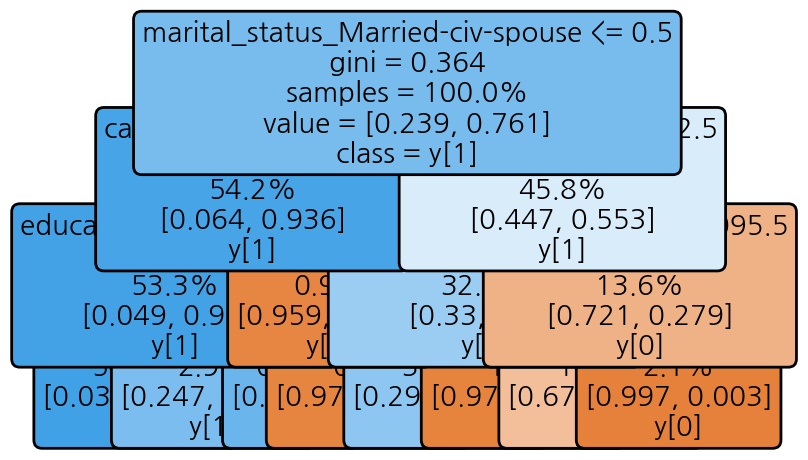

In [67]:
tree.plot_tree(model,
               feature_names = train_x.columns,  # 예측 변수명
               class_names = True,               # 타겟 변수 클래스, 알파벳순, class_names = ['high', 'low'],
               proportion = True,                # 비율 표기
               filled = True,                    # 색칠
               rounded = True,                   # 둥근 테두리
               impurity = True,                  # 불순도 표시
               label = 'root',                   # label 표시 위치
               fontsize = 10);

## 모델을 이용해 예측하기

In [68]:
test_x = df_test.drop(columns = 'income')
test_y = df_test['income']

## 문제 test_x를 가지고 모델을 통해 예측을 얻어내서 df_test['pred']에 저장

In [69]:
df_test['pred'] = model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,False,False,False,False,False,...,False,False,False,False,False,True,False,False,low,low
24768,39,10,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low
26758,31,4,0,0,20,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
14295,23,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
3683,24,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
48445,35,13,10520,0,45,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,high
19639,41,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,low
21606,29,4,0,0,30,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low


In [70]:
df_test.columns

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       ...
       'native_country_Scotland', 'native_country_South',
       'native_country_Taiwan', 'native_country_Thailand',
       'native_country_Trinadad&Tobago', 'native_country_United-States',
       'native_country_Vietnam', 'native_country_Yugoslavia', 'income',
       'pred'],
      dtype='object', length=109)

In [71]:
df_test.columns[-2:] # 마지막 2개 열

Index(['income', 'pred'], dtype='object')

In [72]:
df_test.columns[:5].append(df_test.columns[-2:])

Index(['age', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'income', 'pred'],
      dtype='object')

In [73]:
df_test[df_test.columns[:5].append(df_test.columns[-2:])]

,age,education_num,capital_gain,capital_loss,hours_per_week,income,pred
11712,58,10,0,0,60,low,low
24768,39,10,0,0,40,low,low
26758,31,4,0,0,20,low,low
14295,23,9,0,0,40,low,low
3683,24,9,0,0,40,low,low
...,...,...,...,...,...,...,...
11985,24,13,0,0,30,low,low
48445,35,13,10520,0,45,high,high
19639,41,9,0,0,40,high,low
21606,29,4,0,0,30,low,low


In [74]:
display_side_by_side(df_test[['pred']].head(), df_test[['income']].head())

,pred
11712,low
24768,low
26758,low
14295,low
3683,low
,income
11712,low
24768,low
26758,low
14295,low


In [75]:
# 에측이 잘못된 관측 값 출력
df_test[df_test.pred != df_test.income][['pred', 'income']]

,pred,income
4085,low,high
17604,low,high
32420,low,high
4900,low,high
46618,low,high
...,...,...
20608,low,high
11771,low,high
46223,high,low
32576,low,high


In [76]:
df_test.query('pred != income')[['pred', 'income']]

,pred,income
4085,low,high
17604,low,high
32420,low,high
4900,low,high
46618,low,high
...,...,...
20608,low,high
11771,low,high
46223,high,low
32576,low,high


In [77]:
len(df_test.query('pred == income')[['pred', 'income']]) / len(df_test)

0.8439227461953184

## 성능 평가하기
## confusion matrix 만들기

In [78]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'],    # 예측값
                            labels = ['high', 'low'])    # 클래스 배치 순서
conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

In [79]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'])    # 예측값
conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

## labels: 모양과 유사한 모양(n_classes), 기본값 = none
  * 행렬의 인덱스를 지정할 레이블 목록입니다. 레이블의 하위 집합을 순서를 바꾸거나 선택하는 데 사용할 수 있습니다.
  * 지정하지 않으면 y_true 또는 y_pred에서 한 번 이상 나타나는 레이블이 정렬된 순서로 사용딥니다.

In [80]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi'     : '100',     # 그래프 크기 설정
                     'figure.figsize' : [5, 3]})  # 해상도 설정

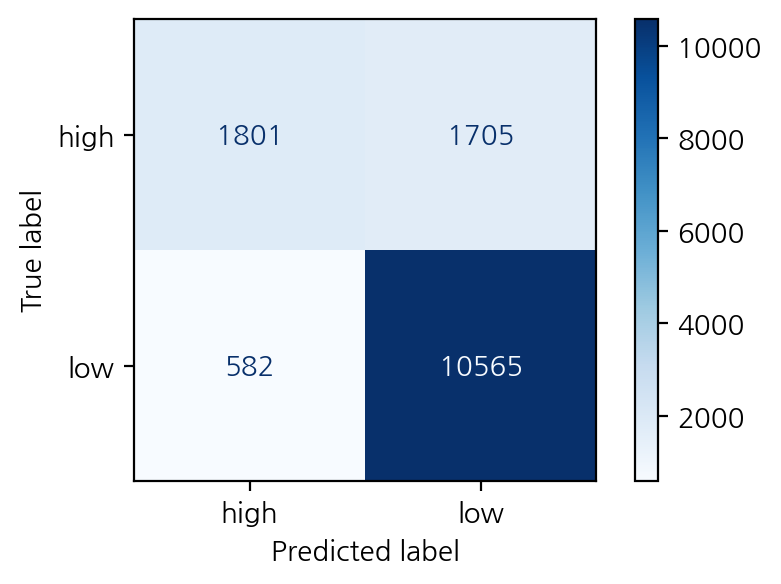

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,       # 컨퓨전 매트릭스
                           display_labels = ('high', 'low'))  # 타겟 변수 클래스명

p.plot(cmap = 'Blues');

In [82]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true = df_test['income'],  # 실제값
                       y_pred = df_test['pred'])    # 예측값

0.8439227461953184

In [83]:
metrics.recall_score(y_true = df_test['income'],  # 실제값
                     y_pred = df_test['pred'],    # 예측값
                     pos_label = 'high')          # 관심 클래스

0.5136908157444381

In [84]:
metrics.f1_score(y_true = df_test['income'],  # 실제값
                 y_pred = df_test['pred'],    # 예측값
                 pos_label = 'high')          # 관심 클래스

0.6116488368143997

In [85]:
a, b = 30, 60
print(f'산술평균 = {(a + b)/ 2}, 조화평균 = {2 / (1/a + 1/b)}')

산술평균 = 45.0, 조화평균 = 40.0


## 정리하기

In [87]:
## 1. 전처리

# 데이터 불러오기
import pandas as pd
df = pd.read_csv('data.adult.csv')

# 1. 타겟 변수 전처리
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')

# 2. 불필요한 변수 제거하기
df = df.drop(columns = 'fnlwgt')

# 3. 문자 타입 변수를 숫자 타입으로 바꾸기
target = df['income']             # income 추출
df = df.drop(columns = 'income')  # income 제거
df = pd.get_dummies(df)           # 원핫 인코딩으로 변환
df['income'] = target             # df에 target 삽입

# 4. 데이터 분할하기
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,          # 테스트 세트 비율
                                     stratify = df['income'],  # 타겟 변수 비율 유지
                                     random_state = 1234)      # 난수 고정


## 2. 의사결정나무 모델 만들기

# 모델 설정하기
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state = 1234,  # 난수 고정
                                  max_depth = 3)        # 나무 깊이

# 모델 만들기
train_x = df_train.drop(columns = 'income')             # 예측 변수 추출
train_y = df_train['income']                            # 타겟 변수 추출
model = clf.fit(X = train_x, y = train_y)               # 모델 만들기

# 모델 구조 살펴보기
import matplotlib.pyplot as plt
tree.plot_tree(model,
               feature_names = train_x.columns,    # 예측 변수명
               class_names = ['high', 'low'],      # 타겟 변수 클래스, 알파벳순
               proportion = True,                  # 비율 표기
               filled = True,                      # 색칠
               rounded = True,                     # 둥근 테두리
               impurity = False,                   # 불순도 표시
               label = 'root',                     # label 표시 위치
               fontsize = 12)                      # 글자 크기


## 3. 모델을 이용해 예측하기

# 예측하기
test_x = df_test.drop(columns = 'income')    # 예측 변수 추출
test_y = df_test['income']                   # 타겟 변수 추출
df_test['pred'] = model.predict(test_x)      # 예측값 구하기

## 4. 성능 평가하기

# confusion matrix 만들기
from sklearn import metrics
conf_mat = confusion_matrix(y_true = df_test['income'],  # 실제값
                            y_pred = df_test['pred'],    # 예측값
                            labels = ['high', 'low'])    # 클래스 배치 순서

# confusion matrix 시각화
from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix = conf_mat,       # 컨퓨전 매트릭스
                           display_labels = ('high', 'low'))  # 타겟 변수 클래스명
p.plot(cmap = 'Blues')                                        # 컬러맵 적용해 출력

# accuracy
metrics.accuracy_score(y_true = df_test['income'],   # 실제값
                       y_pred = df_test['pred'])     # 예측값

# precision
metrics.precision_score(y_true = df_test['income'],  # 실제값
                        y_pred = df_test['pred'],    # 예측값
                        pos_label = 'high')          # 관심 클래스

# recall
metrics.recall_score(y_true = df_test['income'],     # 실제값
                     y_pred = df_test['pred'],       # 예측값
                     pos_label = 'high')             # 관심 클래스

# F1 score
metrics.f1_score(y_true = df_test['income'],         # 실제값
                 y_pred = df_test['pred'],           # 예측값
                 pos_label = 'high')                 # 관심 클래스

FileNotFoundError: [Errno 2] No such file or directory: 'data.adult.csv'